# Clase 13: Neural Networks in Action

En esta clase vamos a aprender a utilizar la libreria de keras para realizar implementaciones de redes neuronales. Utilizaremos un ejemplo de regresión y uno de clasificación, utilizando bases de datos que se encuentran en keras

## Implementación de una red neuronal para clasificación.

En este caso utilizaremos el problema de clasificación de digitos del 0 al 9.

In [1]:
from keras.datasets import mnist
# cargamos los datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Examinamos la cantidad de datos que tenemos en cada subgrupo
print('El tamaño de los datos de entrenamiento es:', train_images.shape)
print('El tamaño de los labels de entrenamiento es:', train_labels.shape)
print('El tamaño de los datos de prueba es:', test_images.shape)
print('El tamaño de los labels de prueba es:', test_labels.shape)

El tamaño de los datos de entrenamiento es: (60000, 28, 28)
El tamaño de los labels de entrenamiento es: (60000,)
El tamaño de los datos de prueba es: (10000, 28, 28)
El tamaño de los labels de prueba es: (10000,)


Ahora observemos alguno de los numeros:

In [2]:
digit = train_images[1030]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

<Figure size 640x480 with 1 Axes>

Ahora creamos la arquitectura de la red. Esto se hace utilizando un modelo secuencial de capas.

In [3]:
# Inicializando los parametros de la red neuronal

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(20, activation='sigmoid', input_shape=(28*28,)))
network.add(layers.Dense(15, activation='sigmoid'))
network.add(layers.Dense(10,activation='sigmoid'))
network.compile(optimizer = 'rmsprop',
                loss='categorical_crossentropy',
               metrics=['accuracy'])

Ahora preprocesamos lso datos par apoder ingresarlos al modelo:

In [4]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [5]:
train_images.shape

(60000, 784)

Ahora preparamos las etiquetas volviendolas variables categoricas:

In [6]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
train_labels.shape

(60000, 10)

Ahora entrenamos la red:

In [8]:
network.fit(train_images, train_labels, epochs=7, batch_size = 128)

Epoch 1/7
469/469 [==============================] - 0s 626us/step - loss: 1.8855 - accuracy: 0.5695
Epoch 2/7
469/469 [==============================] - 0s 612us/step - loss: 1.1040 - accuracy: 0.8074
Epoch 3/7
469/469 [==============================] - 0s 615us/step - loss: 0.6600 - accuracy: 0.8693
Epoch 4/7
469/469 [==============================] - 0s 617us/step - loss: 0.4514 - accuracy: 0.8931
Epoch 5/7
469/469 [==============================] - 0s 622us/step - loss: 0.3535 - accuracy: 0.9087
Epoch 6/7
469/469 [==============================] - 0s 628us/step - loss: 0.2983 - accuracy: 0.9201
Epoch 7/7
469/469 [==============================] - 0s 636us/step - loss: 0.2631 - accuracy: 0.9277


In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 369us/step - loss: 0.2543 - accuracy: 0.9290
test_acc: 0.9290000200271606


In [14]:
weights = [layer.get_weights() for layer in network.layers]

In [25]:
a = weights[0][0]

<function matplotlib.pyplot.show(*args, **kw)>

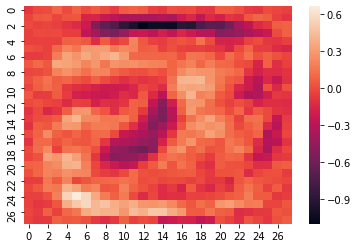

In [54]:
import seaborn as sb

N = 19;
data = a[:,N]
data_shape = data.reshape((28,28))
heat_map = sb.heatmap(data_shape)
plt.show

## Implementación de un ared Neuronal para Regresión

Para este casa utilizaremos los datos del Boston Housing dataset.

In [11]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data,test_targets) = boston_housing.load_data()

print('El tamaño de los datos de entrenamiento es:', train_data.shape)
print('El tamaño de los labels de entrenamiento es:', train_targets.shape)
print('El tamaño de los datos de prueba es:', test_data.shape)
print('El tamaño de los labels de prueba es:', test_targets.shape)

El tamaño de los datos de entrenamiento es: (404, 13)
El tamaño de los labels de entrenamiento es: (404,)
El tamaño de los datos de prueba es: (102, 13)
El tamaño de los labels de prueba es: (102,)


Ahora normalizamos los datos:

In [12]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /=std

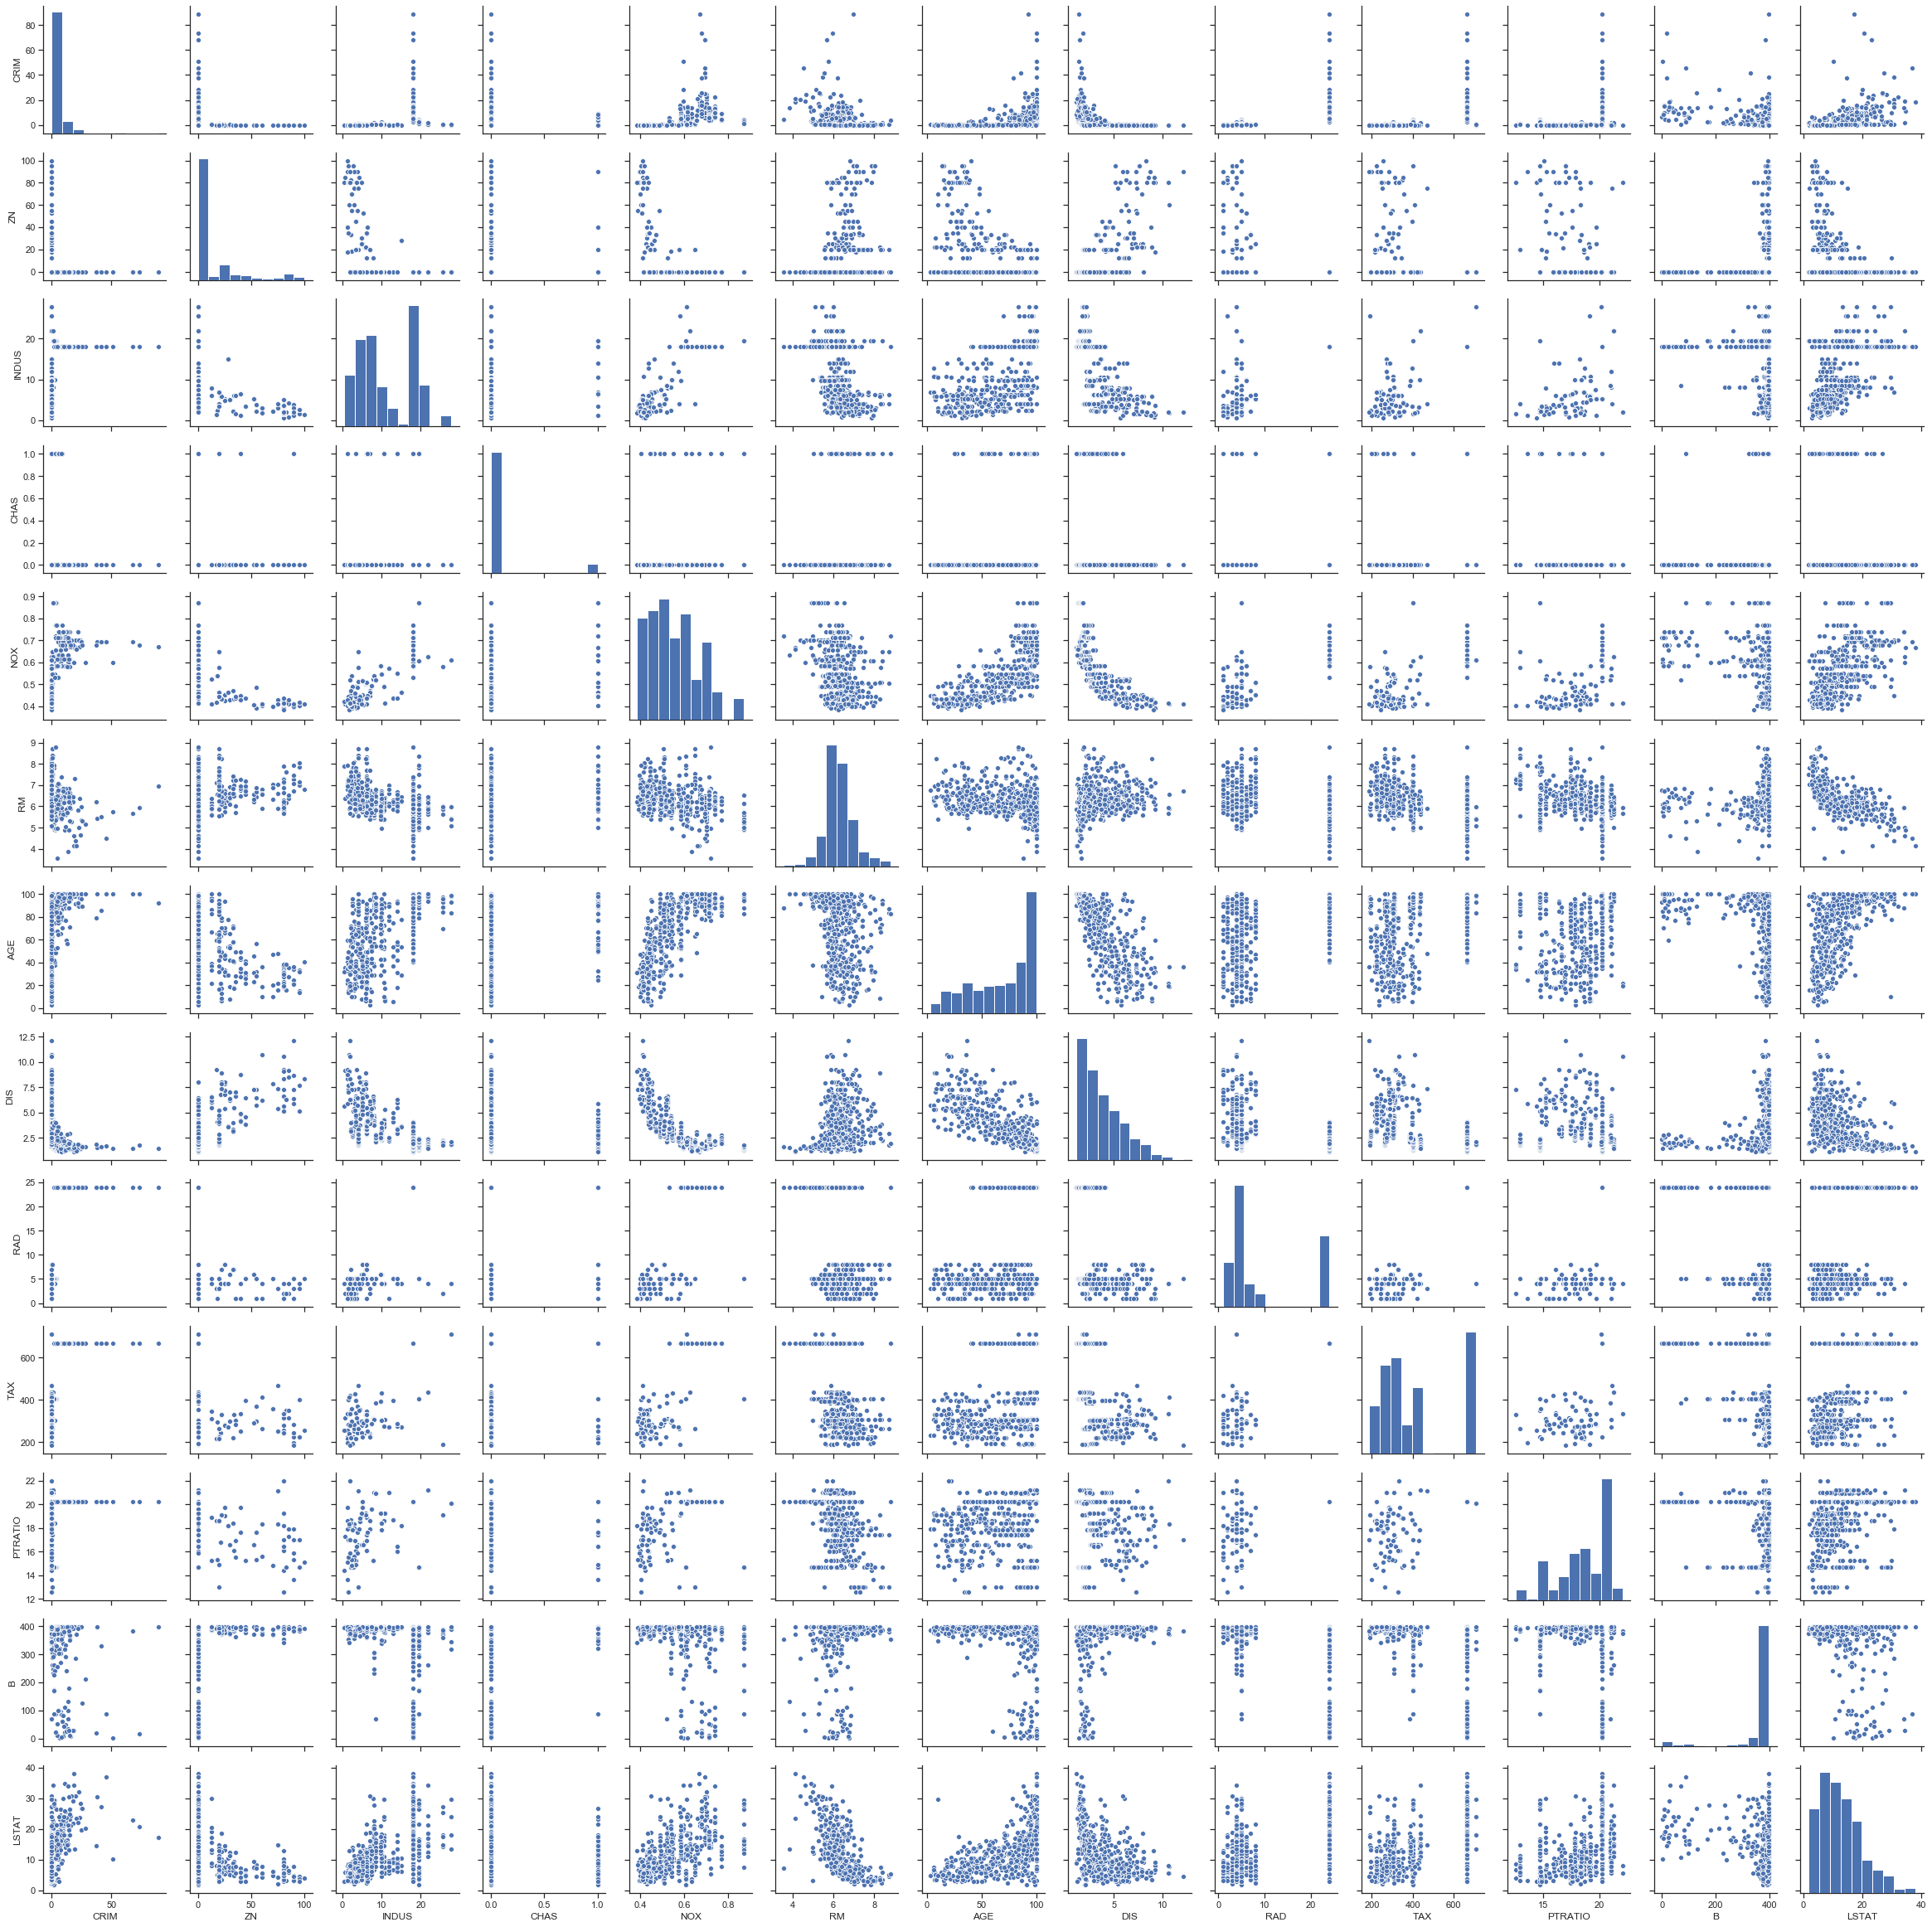

In [22]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_boston

sns.set(style="ticks", color_codes=True)
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
g = sns.pairplot(boston)
plt.show()

Ahora construimos la red:

In [23]:
model = models.Sequential()
model.add(layers.Dense(200,activation = 'relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [24]:
model.fit(train_data, train_targets, epochs=70, batch_size = 128, verbose=1)

Epoch 1/70
4/4 [==============================] - 0s 727us/step - loss: 576.2819 - mae: 22.1545
Epoch 2/70
4/4 [==============================] - 0s 713us/step - loss: 551.4192 - mae: 21.6193
Epoch 3/70
4/4 [==============================] - 0s 635us/step - loss: 534.2772 - mae: 21.2340
Epoch 4/70
4/4 [==============================] - 0s 630us/step - loss: 519.1357 - mae: 20.8888
Epoch 5/70
4/4 [==============================] - 0s 706us/step - loss: 504.3190 - mae: 20.5354
Epoch 6/70
4/4 [==============================] - 0s 600us/step - loss: 490.2679 - mae: 20.2041
Epoch 7/70
4/4 [==============================] - 0s 602us/step - loss: 475.6783 - mae: 19.8595
Epoch 8/70
4/4 [==============================] - 0s 872us/step - loss: 461.1562 - mae: 19.5142
Epoch 9/70
4/4 [==============================] - 0s 799us/step - loss: 446.9046 - mae: 19.1613
Epoch 10/70
4/4 [==============================] - 0s 636us/step - loss: 431.3259 - mae: 18.7804
Epoch 11/70
4/4 [======================

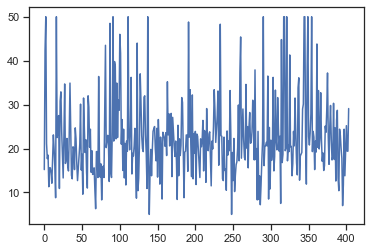

In [30]:
import numpy as np
plt.plot(train_targets)
plt.show()

In [29]:
test_loss, test_acc = model.evaluate(test_data, test_targets)
print('test_mae:', test_acc)
print('amplitud target', np.mean(test_targets))

4/4 [==============================] - 0s 638us/step - loss: 27.5139 - mae: 4.0985
test_mae: 4.098458766937256
amplitud target 23.07843137254902


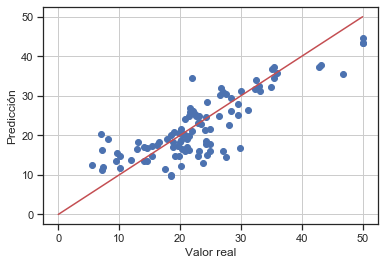

In [36]:
test_pred = model.predict(test_data)
plt.scatter(test_targets,test_pred)
plt.plot([0,50],[0,50],'r')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.grid()
plt.show()